In [1]:
# inport the libaries that are going to be used:

import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# what we use for nueral networks:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

# Data Ingestation

In [2]:
training = pd.read_csv('Data/train.csv')
pd.set_option('display.max_columns', None)
training

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [3]:
df = training.copy()

Notes: 
1. Goal- Predict the sales price for each house. For each ID in the test set, you must predict the value of the SalePrice variable.

2. Target Varaible - SalePrice

In [4]:
df_head = df.head()

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.value_counts('Utilities')

Utilities
AllPub    1459
NoSeWa       1
dtype: int64

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


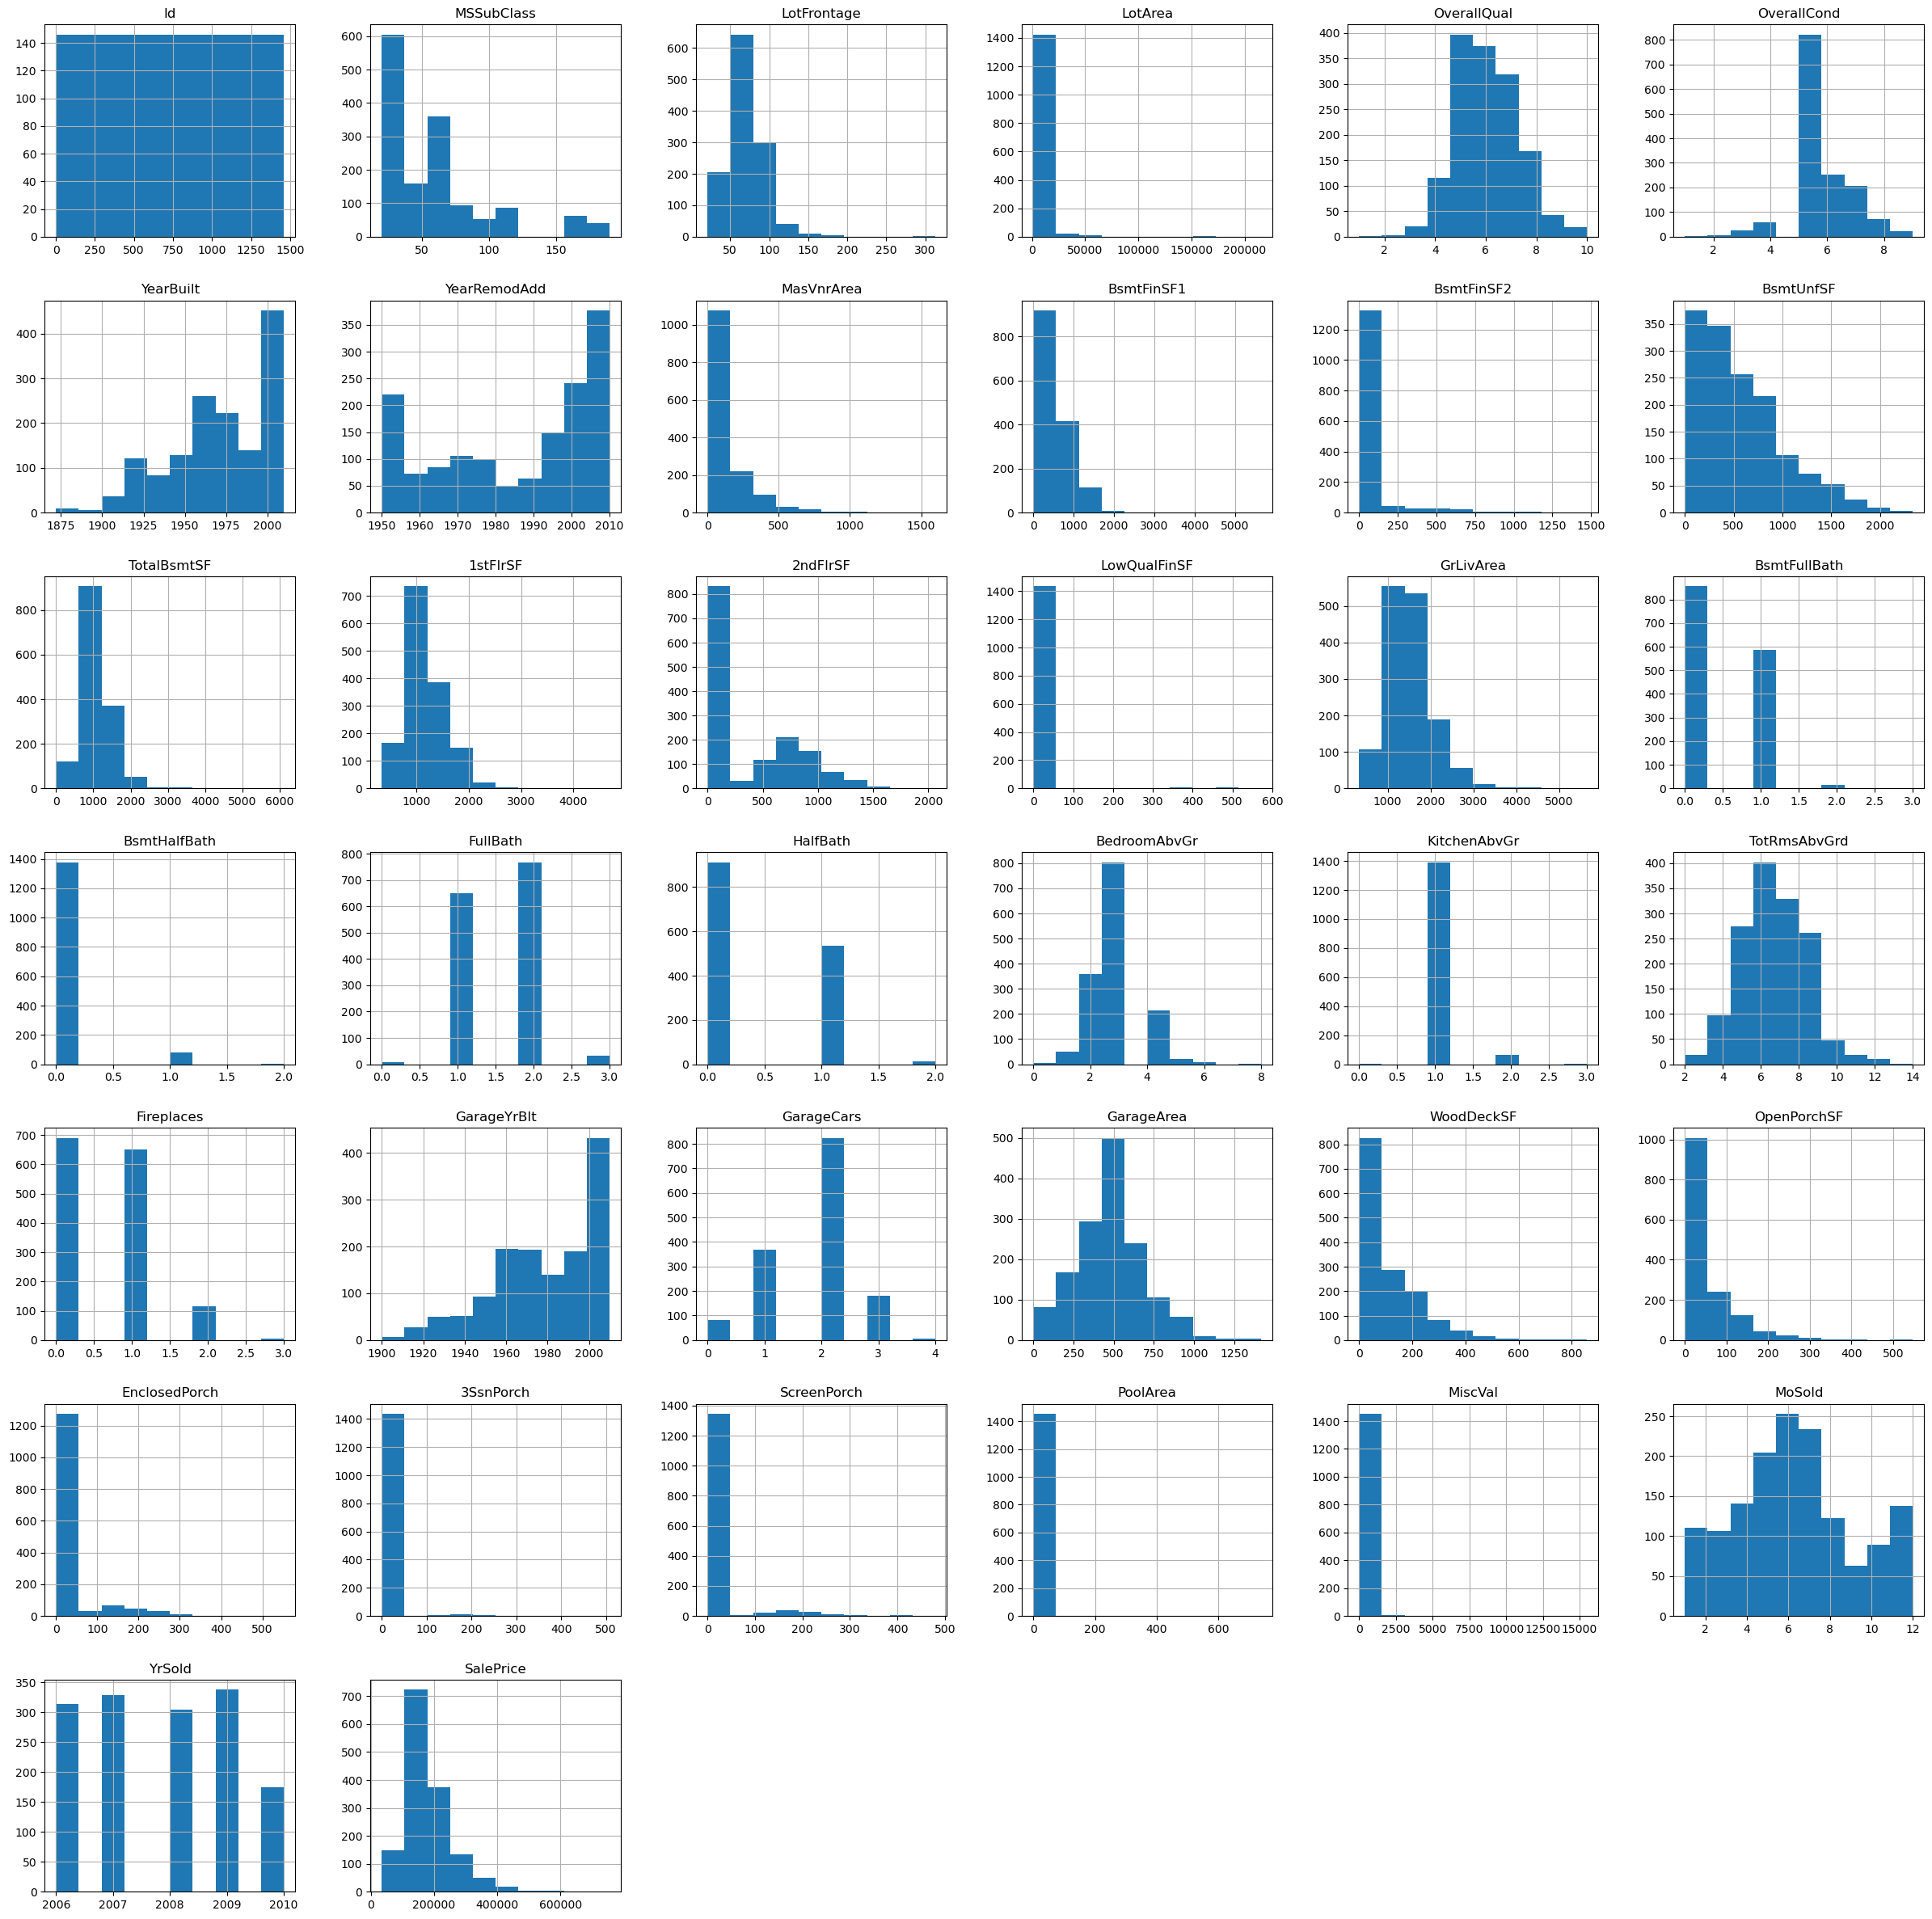

In [8]:
# Suppress the returned output by assigning it to a variable
df.hist(figsize=(30, 30))

# Display the plot without additional output
plt.show()


In [9]:
df.value_counts('Alley') # drop

Alley
Grvl    50
Pave    41
dtype: int64

In [10]:
df.value_counts('MasVnrType')

MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
dtype: int64

In [11]:
df.value_counts('MasVnrArea')

MasVnrArea
0.0       861
180.0       8
108.0       8
72.0        8
16.0        7
         ... 
254.0       1
255.0       1
258.0       1
259.0       1
1600.0      1
Length: 327, dtype: int64

In [12]:
df.value_counts('BsmtQual')

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
dtype: int64

In [13]:
df.value_counts('BsmtCond')

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
dtype: int64

In [14]:
df.value_counts('BsmtFinType2')

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
dtype: int64

In [15]:
df.value_counts('BsmtFinSF1')

BsmtFinSF1
0       467
24       12
16        9
20        5
936       5
       ... 
559       1
556       1
554       1
551       1
5644      1
Length: 637, dtype: int64

In [16]:
df.value_counts(['BsmtExposure','BsmtFinType1'])

BsmtExposure  BsmtFinType1
No            Unf             345
              GLQ             188
              ALQ             150
Av            GLQ             110
No            BLQ             109
              Rec             107
Gd            GLQ              83
No            LwQ              54
Av            Unf              46
              ALQ              38
Mn            GLQ              37
              Unf              27
Gd            ALQ              18
Av            BLQ              16
Mn            BLQ              15
              Rec              15
              ALQ              14
Gd            Unf              11
              LwQ               8
              BLQ               8
              Rec               6
Mn            LwQ               6
Av            LwQ               6
              Rec               5
dtype: int64

In [17]:
df.value_counts('Electrical')

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
dtype: int64

In [18]:
df.value_counts('Fireplaces')

Fireplaces
0    690
1    650
2    115
3      5
dtype: int64

In [19]:
df.value_counts('FireplaceQu')

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
dtype: int64

In [20]:
df.value_counts(['FireplaceQu', 'Fireplaces'])

FireplaceQu  Fireplaces
Gd           1             324
TA           1             259
Gd           2              54
TA           2              53
Fa           1              28
Po           1              20
Ex           1              19
             2               4
Fa           2               4
Gd           3               2
Ex           3               1
Fa           3               1
TA           3               1
dtype: int64

In [21]:
df.value_counts('GarageCars')

GarageCars
2    824
1    369
3    181
0     81
4      5
dtype: int64

In [22]:
df.value_counts('PoolArea')

PoolArea
0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
dtype: int64

In [23]:
df.value_counts('PoolQC')

PoolQC
Gd    3
Ex    2
Fa    2
dtype: int64

In [24]:
df.value_counts('Fence')

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
dtype: int64

In [25]:
df.value_counts('MiscFeature')

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
dtype: int64

In [26]:
df.duplicated().sum() # total of duplicates

0

Notes: As part of the the exploratory analysis stuff that I checked for:
1. Reviewed the dataset info to decide what to drop based on null values and which features to encode.

2. Examined histograms of the entire dataset to decide how to impute null values.

3. Used value_counts to determine how to encode certain variables.

4. Checked for duplicates in the training dataset.

# Data Wrangling

In [27]:
# handling Null values by using a function in the py file:
from preprocessed_data import fillnulls

In [28]:
df = fillnulls(df)

In [29]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

Notes: 
1. The methods I used to impute null values were: mean, median, mode, 0, and "none."


2. The numerical variables that I used the mean for were those that were normally distributed or close to a normal distribution, while the median was used for variables that were 

skewed (i.e., not normally distributed).


3. Mode was used for categorical imputation.


4. Some features were imputed with "none" (for categorical features) or 0 (for numerical features). These features included: 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtFinType2',

'BsmtFinType1', 'FireplaceQu', 'MiscFeature', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 

'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond'.

#  Feature Removal

In [30]:
missing_percentage = df[['Alley', 'PoolQC', 'Fence', 'Utilities']].isnull().mean() * 100

print(missing_percentage)
# checking the percentages before deciding to drop them.


Alley        93.767123
PoolQC       99.520548
Fence        80.753425
Utilities     0.000000
dtype: float64


In [31]:
df = df.drop(['Alley', 'PoolQC', 'Fence', 'Utilities'], axis=1)

In [32]:
len(df.columns)

77

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Notes: 
1. Based on the exploratory analysis, I decided to drop the following  features: 'Alley', 'PoolQC', 'Fence', and 'Utilities', as these columns had  too many null values.


2. To fully determine which features to drop, I reviewed the missing percentages for the listed columns and concluded that these should be dropped due to their high percentages. 

Although the percentage for 'Utilities' was 0, after examining the value_counts in the EDA portion, the output was:

Utilities:

- AllPub: 1459
- NoSeWa: 1
dtype: int64

This showed that 'Utilities' had very low variance, with almost all values being the same, making it unlikely to be beneficial to the model.


# Feature Engineering

In [ ]:
# Using feature engineering to reduce dimensionality:
from preprocessed_data import ft_engineering

In [35]:
df = ft_engineering(df)

In [36]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,TotalPorchSF,Age,AgeRemod,TotalQual_Cond
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,NaN,0,2,WD,Normal,208500,2566,3.5,61,5,5,12
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,0,NaN,0,5,WD,Normal,181500,2524,2.5,298,31,31,14
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,NaN,0,9,WD,Normal,223500,2706,3.5,42,7,6,12
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,NaN,0,2,WD,Abnorml,140000,2473,2.0,307,91,36,12
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,0,NaN,0,12,WD,Normal,250000,3343,3.5,276,8,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,GasA,Ex,Y,SBrkr,0,1647,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,NaN,0,8,WD,Normal,175000,2600,2.5,40,8,7,11
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,GasA,TA,Y,SBrkr,0,2073,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,0,NaN,0,2,WD,Normal,210000,3615,3.0,349,32,22,12
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,GasA,Ex,Y,SBrkr,0,2340,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,Shed,2500,5,WD,Normal,266500,3492,2.0,60,69,4,16
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,GasA,Gd,Y,FuseA,0,1078,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,0,NaN,0,4,WD,Normal,142125,2156,2.0,478,60,14,11


Notes: 
I chose to feature engineer the following columns: 'TotalBsmtSF', '1stFlrSF',  '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 

'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'OverallQual', and 'OverallCond'. These were replaced by new features such as 'TotalQual_Cond', 

'AgeRemod', 'Age', 'TotalPorchSF', 'TotalBathrooms', and 'TotalSF' to improve model performance. The reason I chose to combine and drop these features was due to dimensionality 

concerns, which can lead to overfitting. This process also made the model more efficient and helped prevent overfitting.

# Encoding

In [37]:
df.value_counts("MSZoning")

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
dtype: int64

In [38]:
df.value_counts("Street")  # one hot

Street
Pave    1454
Grvl       6
dtype: int64

In [39]:
df.value_counts('Neighborhood')

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
dtype: int64

In [40]:
df.value_counts("LotShape")

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
dtype: int64

In [41]:
df.value_counts('LandContour')

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
dtype: int64

In [42]:
df.value_counts('LotConfig')

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
dtype: int64

In [43]:
df.value_counts('LandSlope')

LandSlope
Gtl    1382
Mod      65
Sev      13
dtype: int64

In [44]:
df.value_counts('Neighborhood')

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
dtype: int64

In [45]:
df.value_counts('Condition1')

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
dtype: int64

In [46]:
df.value_counts('BldgType')

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
dtype: int64

In [47]:
df.value_counts('HouseStyle')

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
dtype: int64

In [48]:
df.value_counts('ExterCond')

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
dtype: int64

In [49]:
df.value_counts('ExterQual')

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
dtype: int64

In [50]:
df.select_dtypes(include=['object']).columns.tolist() 
# listing all categorical columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [51]:
# looking at the total number of categorical variables 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Total number of categorical variables: {len(categorical_cols)}")

Total number of categorical variables: 39


In [52]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [53]:
print(df['BsmtCond'].unique())

['TA' 'Gd' nan 'Fa' 'Po']


In [54]:
print(df['BsmtExposure'].unique())

['No' 'Gd' 'Mn' 'Av']


In [55]:
print(df['GarageCond'].unique())

['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [56]:
# Encoding categorical features that have some kind of order 
from preprocessed_data import ordinal_encode
df = ordinal_encode(df)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,TotalPorchSF,Age,AgeRemod,TotalQual_Cond
0,1,60,RL,65.0,8450,Pave,4,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3.0,1,7,706,2,0,150,GasA,5,Y,SBrkr,0,1710,3,1,4,8,Typ,0,0.0,Attchd,2003.0,RFn,2,548,3.0,3.0,Y,0,NaN,0,2,WD,Normal,208500,2566,3.5,61,5,5,12
1,2,20,RL,80.0,9600,Pave,4,Lvl,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3.0,4,6,978,2,0,284,GasA,5,Y,SBrkr,0,1262,3,1,3,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460,3.0,3.0,Y,0,NaN,0,5,WD,Normal,181500,2524,2.5,298,31,31,14
2,3,60,RL,68.0,11250,Pave,3,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3.0,2,7,486,2,0,434,GasA,5,Y,SBrkr,0,1786,3,1,4,6,Typ,1,3.0,Attchd,2001.0,RFn,2,608,3.0,3.0,Y,0,NaN,0,9,WD,Normal,223500,2706,3.5,42,7,6,12
3,4,70,RL,60.0,9550,Pave,3,Lvl,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4.0,1,6,216,2,0,540,GasA,4,Y,SBrkr,0,1717,3,1,4,7,Typ,1,4.0,Detchd,1998.0,Unf,3,642,3.0,3.0,Y,0,NaN,0,2,WD,Abnorml,140000,2473,2.0,307,91,36,12
4,5,60,RL,84.0,14260,Pave,3,Lvl,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3.0,3,7,655,2,0,490,GasA,5,Y,SBrkr,0,2198,4,1,4,9,Typ,1,3.0,Attchd,2000.0,RFn,3,836,3.0,3.0,Y,0,NaN,0,12,WD,Normal,250000,3343,3.5,276,8,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,4,Lvl,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3.0,1,2,0,2,0,953,GasA,5,Y,SBrkr,0,1647,3,1,3,7,Typ,1,3.0,Attchd,1999.0,RFn,2,460,3.0,3.0,Y,0,NaN,0,8,WD,Normal,175000,2600,2.5,40,8,7,11
1456,1457,20,RL,85.0,13175,Pave,4,Lvl,Inside,3,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,3.0,1,6,790,4,163,589,GasA,3,Y,SBrkr,0,2073,3,1,3,7,Min1,2,3.0,Attchd,1978.0,Unf,2,500,3.0,3.0,Y,0,NaN,0,2,WD,Normal,210000,3615,3.0,349,32,22,12
1457,1458,70,RL,66.0,9042,Pave,4,Lvl,Inside,3,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,5,4,Stone,3,4.0,1,7,275,2,0,877,GasA,5,Y,SBrkr,0,2340,4,1,4,9,Typ,2,4.0,Attchd,1941.0,RFn,1,252,3.0,3.0,Y,0,Shed,2500,5,WD,Normal,266500,3492,2.0,60,69,4,16
1458,1459,20,RL,68.0,9717,Pave,4,Lvl,Inside,3,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,3,3.0,2,7,49,4,1029,0,GasA,4,Y,FuseA,0,1078,2,1,4,5,Typ,0,0.0,Attchd,1950.0,Unf,1,240,3.0,3.0,Y,0,NaN,0,4,WD,Normal,142125,2156,2.0,478,60,14,11


In [57]:
# Checking for any remaining NaNs in the dataset after encoding
nan_columns = df.columns[df.isnull().any()]
print(f"Columns with NaNs after ordinal encoding: {nan_columns}")

Columns with NaNs after ordinal encoding: Index(['BsmtCond', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'MiscFeature'],
      dtype='object')


In [58]:
df['FireplaceQu'].skew()

0.0948656586484223

In [59]:
# Imputing the features that were created from the ordinal encoding 
from preprocessed_data import choose_imputation_strategy, impute_train
# Define columns to impute based on the code that was used to check for NaN's
columns_to_impute = ['BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
# Train the imputers on the training data
df_train_imputed, trained_imputers = impute_train(df, columns_to_impute, imputer_dict={})


In [60]:
df.isnull().sum().sum()
# checking for null values to make sure

1568

In [61]:
# Encoding CentralAir 1 for 'Y' and 0 to 'N' by using the .map()
df['CentralAir'] = df['CentralAir'].map({'Y': 1, 'N': 0})

In [62]:
# Target Encoding: 'Neighborhood', 'Condition1', 'Condition2', 'Functional', 'MiscFeature'
from preprocessed_data import target_encode_train 
target_cols = ['Neighborhood', 'Condition1', 'Condition2', 'Functional', 'MiscFeature']
data, targ_encoders= target_encode_train(df, target_cols, 'SalePrice')


In [63]:
# One Hot Encoding: 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'
from preprocessed_data import one_hot_encode_train
one_hot_cols = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
df, onehot_encoders = one_hot_encode_train(df, one_hot_cols)

In [64]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Total number of categorical variables: {len(categorical_cols)}")

Total number of categorical variables: 0


In [65]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 152 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    Id                     int64  
 1    MSSubClass             int64  
 2    LotFrontage            float64
 3    LotArea                int64  
 4    LotShape               int64  
 5    LandSlope              int64  
 6    Neighborhood           float64
 7    Condition1             float64
 8    Condition2             float64
 9    MasVnrArea             float64
 10   ExterQual              int64  
 11   ExterCond              int64  
 12   BsmtQual               int64  
 13   BsmtCond               float64
 14   BsmtExposure           int64  
 15   BsmtFinType1           int64  
 16   BsmtFinSF1             int64  
 17   BsmtFinType2           int64  
 18   BsmtFinSF2             int64  
 19   BsmtUnfSF              int64  
 20   HeatingQC              int64  
 21   CentralAir             int64  
 22 

Notes:
1. Before encoding, I checked the value_counts as well as the unique values of some of these categorical variables to decide how to encode them.


2. I started by performing ordinal encoding on the following features: 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 

'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', and 'GarageCond'.


3. After applying ordinal encoding, I found that I still had NaN values, so I addressed this by using the functions choose_imputation_strategy to determine how to impute, and 

impute_train. 


4. Target-encoded columns are: 'Neighborhood', 'Condition1', 'Condition2', 'Functional', and 'MiscFeature'.


5. One-hot encoded columns include: 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 

'Foundation', 'Heating', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', and 'SaleCondition'.

6. To check for any errors in encoding, I reviewed the categorical variables again.

# Train Test Split

In [66]:
X = df.drop('SalePrice', axis=1) 
y = df['SalePrice'] # target varaible

In [67]:
# Splitting the data into train test for validation:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

# Ensure your model is trained
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Train the model on the training data

# Make predictions
y_lr_pred = lr_model.predict(X_val)

# Adjust negative predictions
y_lr_pred_adjusted = np.where(y_lr_pred < 0, 1e-5, y_lr_pred)

# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(np.log(y_val + 1e-5), np.log(y_lr_pred_adjusted + 1e-5)))
print("Linear Regression Validation RMSE:", rmse_lr)


Linear Regression Validation RMSE: 1.218345442403592


# Neural Networks

In [196]:
model = Sequential()
model.add(Dense(24,input_dim=151, activation='relu')) # first layer here the 151 is cols in X_train
model.add(Dense(64, activation='relu')) # second layer, relu- 
model.add(Dense(1, activation='linear')) # for regression

/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [ ]:
# Fitting the model:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=[X_val, y_val])

Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32636968960.0000 - mae: 156954.8438 - val_loss: 5772711936.0000 - val_mae: 49181.9727
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 5765290496.0000 - mae: 55309.4141 - val_loss: 5076045312.0000 - val_mae: 48505.1133
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 4979663872.0000 - mae: 49247.2227 - val_loss: 4751737344.0000 - val_mae: 48552.5195
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 4376329728.0000 - mae: 45149.7852 - val_loss: 4412304896.0000 - val_mae: 47030.6523
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 4564650496.0000 - mae: 49195.9805 - val_loss: 4034615552.0000 - val_mae: 42012.9844
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 3480814080.0000 - mae: 41489.5977 - val_loss: 3721759232.0000 - val_mae: 41891.1016
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 3345122304.0000 - mae: 42777.8164 - val_loss: 3401067264.0000 - val_m

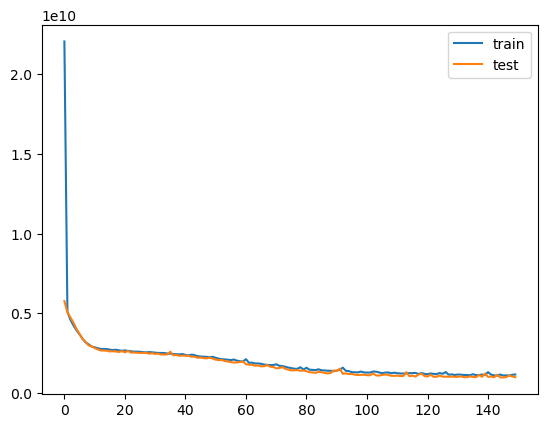

In [ ]:
# Plotting both the loss and the val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc = 'upper right')

In [ ]:
# Predicting on training set:
pred_NN = model.predict(X_val)
pred_NN

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[219094.7  ],
       [180534.31 ],
       [123343.86 ],
       [ 77301.336],
       [164924.48 ],
       [352203.25 ],
       [314683.25 ],
       [154651.89 ],
       [203101.5  ],
       [251372.5  ],
       [220645.19 ],
       [ 97460.266],
       [195219.19 ],
       [275682.84 ],
       [249870.66 ],
       [134334.64 ],
       [116536.73 ],
       [158328.38 ],
       [243991.28 ],
       [139981.5  ],
       [151414.64 ],
       [177625.69 ],
       [263634.4  ],
       [326624.62 ],
       [120760.945],
       [187134.6  ],
       [142050.69 ],
       [186131.69 ],
       [430702.47 ],
       [132429.4  ],
       [170164.84 ],
       [119145.71 ],
       [137778.3  ],
       [112128.2  ],
       [183070.6  ],
       [350733.06 ],
       [132554.1  ],
       [ 85496.23 ],
       [274098.16 ],
       [116342.64 ],
       [141696.97 ],
       [150512.55 ],
       [ 94762.086],
       [128288.695],
       [186126.62 ],
       [215573.19 ],
       [111540.25 ],
       [16721

In [ ]:
# Getting the validation score from the training set:
rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(pred_NN)))
print("Validation RMSE:", rmse)

Validation RMSE: 0.17655693772718448


# XGBOOST Modeling + Metric Evaluation

In [70]:
# improve training speed and memory efficiency.
dtrain = xgb.DMatrix(X_train, label=y_train) 
dval = xgb.DMatrix(X_val, label=y_val)


In [71]:
params = {
    'objective': 'reg:squarederror', # learning task
    'eval_metric': 'rmse', # root_means_squared
    'eta': 0.01,  # learning rate
    'max_depth': 6,  # Max depth of a tree
    'subsample': 0.8,  # controls the fraction of the training data to be randomly sampled
    'colsample_bytree': 0.8,  # the fraction of feature to be randomly sampled for each tree
    'min_child_weight': 2,  # controls the min sum of instance weight 
    'gamma': 0.2,  # Min loss reduction required to make a further partition on a leaf node. 
    'reg_alpha': 0.5, # L1 regularization term on weights. 
    'reg_lambda': 0.5, # L2 regularization term on weights. 
    'seed': 42 # random seed for reproducibility, this ensures the result to be consistent across different runs of the model.
}

In [72]:
num_boost_round = 5000 # number of boosting rounds
evallist = [(dval, 'eval'), (dtrain, 'train')] # list of evaluation datasets to model perfomance
model = xgb.train(params, dtrain, num_boost_round, evallist, early_stopping_rounds=50, verbose_eval=10)

[0]	eval-rmse:81524.75820	train-rmse:77865.76957
[10]	eval-rmse:75999.09251	train-rmse:71578.06702


/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[20]	eval-rmse:70882.88077	train-rmse:65826.59234
[30]	eval-rmse:66254.08920	train-rmse:60554.74836
[40]	eval-rmse:62052.44427	train-rmse:55828.40857
[50]	eval-rmse:58289.00086	train-rmse:51528.80359
[60]	eval-rmse:54678.91666	train-rmse:47529.54319
[70]	eval-rmse:51734.65647	train-rmse:43971.44278
[80]	eval-rmse:48888.11148	train-rmse:40733.19505
[90]	eval-rmse:46556.66162	train-rmse:37796.65365
[100]	eval-rmse:44457.38176	train-rmse:35093.28931
[110]	eval-rmse:42453.11169	train-rmse:32646.18026
[120]	eval-rmse:40785.76933	train-rmse:30446.50291
[130]	eval-rmse:39266.87880	train-rmse:28420.58814
[140]	eval-rmse:37901.05718	train-rmse:26551.72753
[150]	eval-rmse:36662.00046	train-rmse:24861.41709
[160]	eval-rmse:35496.42390	train-rmse:23324.64571
[170]	eval-rmse:34517.01199	train-rmse:21944.87363
[180]	eval-rmse:33661.15451	train-rmse:20658.59812
[190]	eval-rmse:33012.35348	train-rmse:19459.82687
[200]	eval-rmse:32340.49106	train-rmse:18390.62366
[210]	eval-rmse:31802.22782	train-rmse:

In [73]:
# Make predictions on the validation set
y_pred = model.predict(dval)

In [74]:
# Calculate RMSE for the training set
rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(y_pred)))
print("Validation RMSE:", rmse)

Validation RMSE: 0.12223957988332161


# Same Preprocessing Steps as in Training

In [203]:
test = pd.read_csv('Data/test.csv')
test_df = test.copy()

In [ ]:
# handling Null values by using a function in the py file:
from preprocessed_data import fillnulls
test_df = fillnulls(test_df)
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,1979.0,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,C

In [205]:
test_df.isnull().sum().sum()

6620

In [ ]:
# imputing the rests of the null values that were not present in the training set:

test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].median())
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].median())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mode()[0])

In [207]:
test_df['GarageArea'].skew() 

0.30023886715225306

In [208]:
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

In [209]:
test_df['BsmtUnfSF'].skew() # median imputation

0.919916339164844

In [210]:
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].median())

In [ ]:
test_df = test_df.drop(['Alley', 'PoolQC', 'Fence', 'Utilities'], axis=1)
# dropping the same features as in the training set.

In [212]:
len(test_df.columns)

76

In [ ]:
# Using feature engineering to reduce dimensiality:
from preprocessed_data import ft_engineering
test_df = ft_engineering(test_df)
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,TotalSF,TotalBathrooms,TotalPorchSF,Age,AgeRemod,TotalQual_Cond
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,GasA,TA,Y,SBrkr,0,896,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,0,NaN,0,6,WD,Normal,1778.0,1.0,260,49,49,11
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,GasA,TA,Y,SBrkr,0,1329,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,0,Gar2,12500,6,WD,Normal,2658.0,1.5,429,52,52,12
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,GasA,Gd,Y,SBrkr,0,1629,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,0,NaN,0,3,WD,Normal,2557.0,2.5,246,13,12,10
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,GasA,Ex,Y,SBrkr,0,1604,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,0,NaN,0,6,WD,Normal,2530.0,2.5,396,12,12,12
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,GasA,Ex,Y,SBrkr,0,1280,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,NaN,0,1,WD,Normal,2560.0,2.0,226,18,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,GasA,Gd,Y,SBrkr,0,1092,3,1,TA,5,Typ,0,NaN,NaN,1979.0,NaN,0.0,0.0,NaN,NaN,Y,0,NaN,0,6,WD,Normal,1638.0,1.5,0,36,36,11
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,GasA,TA,Y,SBrkr,0,1092,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,NaN,0,4,WD,Abnorml,1638.0,1.5,24,36,36,9
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,GasA,Ex,Y,SBrkr,0,1224,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,0,NaN,0,9,WD,Abnorml,2448.0,2.0,474,46,10,12
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,GasA,TA,Y,SBrkr,0,970,3,1,TA,6,Typ,0,NaN,NaN,1979.0,NaN,0.0,0.0,NaN,NaN,Y,0,Shed,700,7,WD,Normal,1882.0,1.5,112,14,14,10


In [ ]:
# Encoding categorical features that have some kind of order:
from preprocessed_data import ordinal_encode
test_df = ordinal_encode(test_df)
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,TotalSF,TotalBathrooms,TotalPorchSF,Age,AgeRemod,TotalQual_Cond
0,1461,20,RH,80.0,11622,Pave,4,Lvl,Inside,3,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3.0,1,4,468.0,3,144.0,270.0,GasA,3,Y,SBrkr,0,896,2,1,3,5,Typ,0,0.0,Attchd,1961.0,Unf,1.0,730.0,3.0,3.0,Y,0,NaN,0,6,WD,Normal,1778.0,1.0,260,49,49,11
1,1462,20,RL,81.0,14267,Pave,3,Lvl,Corner,3,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3,3.0,1,6,923.0,2,0.0,406.0,GasA,3,Y,SBrkr,0,1329,3,1,4,6,Typ,0,0.0,Attchd,1958.0,Unf,1.0,312.0,3.0,3.0,Y,0,Gar2,12500,6,WD,Normal,2658.0,1.5,429,52,52,12
2,1463,60,RL,74.0,13830,Pave,3,Lvl,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3.0,1,7,791.0,2,0.0,137.0,GasA,4,Y,SBrkr,0,1629,3,1,3,6,Typ,1,3.0,Attchd,1997.0,Fin,2.0,482.0,3.0,3.0,Y,0,NaN,0,3,WD,Normal,2557.0,2.5,246,13,12,10
3,1464,60,RL,78.0,9978,Pave,3,Lvl,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3,3,PConc,3,3.0,1,7,602.0,2,0.0,324.0,GasA,5,Y,SBrkr,0,1604,3,1,4,7,Typ,1,4.0,Attchd,1998.0,Fin,2.0,470.0,3.0,3.0,Y,0,NaN,0,6,WD,Normal,2530.0,2.5,396,12,12,12
4,1465,120,RL,43.0,5005,Pave,3,HLS,Inside,3,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3.0,1,6,263.0,2,0.0,1017.0,GasA,5,Y,SBrkr,0,1280,2,1,4,5,Typ,0,0.0,Attchd,1992.0,RFn,2.0,506.0,3.0,3.0,Y,0,NaN,0,1,WD,Normal,2560.0,2.0,226,18,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,4,Lvl,Inside,3,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3.0,1,2,0.0,2,0.0,546.0,GasA,4,Y,SBrkr,0,1092,3,1,3,5,Typ,0,0.0,NaN,1979.0,NaN,0.0,0.0,0.0,0.0,Y,0,NaN,0,6,WD,Normal,1638.0,1.5,0,36,36,11
1455,2916,160,RM,21.0,1894,Pave,4,Lvl,Inside,3,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3.0,1,4,252.0,2,0.0,294.0,GasA,3,Y,SBrkr,0,1092,3,1,3,6,Typ,0,0.0,CarPort,1970.0,Unf,1.0,286.0,3.0,3.0,Y,0,NaN,0,4,WD,Abnorml,1638.0,1.5,24,36,36,9
1456,2917,20,RL,160.0,20000,Pave,4,Lvl,Inside,3,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3.0,1,6,1224.0,2,0.0,0.0,GasA,5,Y,SBrkr,0,1224,4,1,3,7,Typ,1,3.0,Detchd,1960.0,Unf,2.0,576.0,3.0,3.0,Y,0,NaN,0,9,WD,Abnorml,2448.0,2.0,474,46,10,12
1457,2918,85,RL,62.0,10441,Pave,4,Lvl,Inside,3,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,3,PConc,4,3.0,3,7,337.0,2,0.0,575.0,GasA,3,Y,SBrkr,0,970,3,1,3,6,Typ,0,0.0,NaN,1979.0,NaN,0.0,0.0,0.0,0.0,Y,0,Shed,700,7,WD,Normal,1882.0,1.5,112,14,14,10


In [ ]:
# Check for any remaining NaNs in the dataset after encoding:
nan_columns = test_df.columns[test_df.isnull().any()]
print(f"Columns with NaNs after ordinal encoding: {nan_columns}")

Columns with NaNs after ordinal encoding: Index(['BsmtCond', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'MiscFeature'],
      dtype='object')


In [ ]:
# Imputing the features that were created from the ordinal encoding the same way as in impute_train:
from preprocessed_data import impute_test
# Now apply the trained imputers to the test data using the imputer_dict from training
test_df = impute_test(test_df, columns_to_impute, trained_imputers)


In [217]:
test_df.isnull().sum().sum()

1562

In [218]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,TotalSF,TotalBathrooms,TotalPorchSF,Age,AgeRemod,TotalQual_Cond
0,1461,20,RH,80.0,11622,Pave,4,Lvl,Inside,3,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3.0,1,4,468.0,3,144.0,270.0,GasA,3,Y,SBrkr,0,896,2,1,3,5,Typ,0,0.0,Attchd,1961.0,Unf,1.0,730.0,3.0,3.0,Y,0,NaN,0,6,WD,Normal,1778.0,1.0,260,49,49,11
1,1462,20,RL,81.0,14267,Pave,3,Lvl,Corner,3,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3,3.0,1,6,923.0,2,0.0,406.0,GasA,3,Y,SBrkr,0,1329,3,1,4,6,Typ,0,0.0,Attchd,1958.0,Unf,1.0,312.0,3.0,3.0,Y,0,Gar2,12500,6,WD,Normal,2658.0,1.5,429,52,52,12
2,1463,60,RL,74.0,13830,Pave,3,Lvl,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3.0,1,7,791.0,2,0.0,137.0,GasA,4,Y,SBrkr,0,1629,3,1,3,6,Typ,1,3.0,Attchd,1997.0,Fin,2.0,482.0,3.0,3.0,Y,0,NaN,0,3,WD,Normal,2557.0,2.5,246,13,12,10
3,1464,60,RL,78.0,9978,Pave,3,Lvl,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3,3,PConc,3,3.0,1,7,602.0,2,0.0,324.0,GasA,5,Y,SBrkr,0,1604,3,1,4,7,Typ,1,4.0,Attchd,1998.0,Fin,2.0,470.0,3.0,3.0,Y,0,NaN,0,6,WD,Normal,2530.0,2.5,396,12,12,12
4,1465,120,RL,43.0,5005,Pave,3,HLS,Inside,3,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3.0,1,6,263.0,2,0.0,1017.0,GasA,5,Y,SBrkr,0,1280,2,1,4,5,Typ,0,0.0,Attchd,1992.0,RFn,2.0,506.0,3.0,3.0,Y,0,NaN,0,1,WD,Normal,2560.0,2.0,226,18,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,4,Lvl,Inside,3,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3.0,1,2,0.0,2,0.0,546.0,GasA,4,Y,SBrkr,0,1092,3,1,3,5,Typ,0,0.0,NaN,1979.0,NaN,0.0,0.0,0.0,0.0,Y,0,NaN,0,6,WD,Normal,1638.0,1.5,0,36,36,11
1455,2916,160,RM,21.0,1894,Pave,4,Lvl,Inside,3,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3.0,1,4,252.0,2,0.0,294.0,GasA,3,Y,SBrkr,0,1092,3,1,3,6,Typ,0,0.0,CarPort,1970.0,Unf,1.0,286.0,3.0,3.0,Y,0,NaN,0,4,WD,Abnorml,1638.0,1.5,24,36,36,9
1456,2917,20,RL,160.0,20000,Pave,4,Lvl,Inside,3,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3.0,1,6,1224.0,2,0.0,0.0,GasA,5,Y,SBrkr,0,1224,4,1,3,7,Typ,1,3.0,Detchd,1960.0,Unf,2.0,576.0,3.0,3.0,Y,0,NaN,0,9,WD,Abnorml,2448.0,2.0,474,46,10,12
1457,2918,85,RL,62.0,10441,Pave,4,Lvl,Inside,3,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,3,PConc,4,3.0,3,7,337.0,2,0.0,575.0,GasA,3,Y,SBrkr,0,970,3,1,3,6,Typ,0,0.0,NaN,1979.0,NaN,0.0,0.0,0.0,0.0,Y,0,Shed,700,7,WD,Normal,1882.0,1.5,112,14,14,10


In [ ]:
# Encoding CentralAir 1 for 'Y' and 0 to 'N' by using the .map():
test_df['CentralAir'] = test_df['CentralAir'].map({'Y': 1, 'N': 0})

In [220]:
print("Columns in test_df:", test_df.columns.tolist())


Columns in test_df: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'TotalSF', 'TotalBathrooms', 'TotalPorchSF', 'Age', 'AgeRemod', 'TotalQual_Cond']


In [221]:
test_df['Neighborhood'].value_counts()

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

In [ ]:
# Target Encoding the same features as in target_encode_train:
from preprocessed_data import target_encode_test
test_df = target_encode_test(test_df, targ_encoders, target_cols)

In [ ]:
# One Hot Encoding same features as in one_hot_encode_train:
from preprocessed_data import one_hot_encode_test
test_df, onehot_encoders = one_hot_encode_test(test_df, onehot_encoders, one_hot_cols)

In [224]:
categorical_cols = test_df.select_dtypes(include=['object']).columns.tolist()
print(f"Total number of categorical variables: {len(categorical_cols)}")
# checked how many categorical variables there are for any error purposes

Total number of categorical variables: 0


# Prediction for Linear Regression

In [ ]:
# Prediction for LR:
y_pred = lr_model.predict(test_df)

# Prediction for Neural Networks

In [ ]:
# Predictions for NN:
predicted_saleprice = model.predict(test_df)
predicted_saleprice

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[126603.97 ],
       [181871.97 ],
       [204225.3  ],
       ...,
       [195329.53 ],
       [125843.484],
       [212188.06 ]], dtype=float32)

In [ ]:
predicted_saleprice = predicted_saleprice.flatten()  # Convert to 1D

In [227]:
# Create submission DataFrame
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': predicted_saleprice})
submission.to_csv('submission_NN.csv', index=False)

# Prediction for XGBOOST

In [ ]:
# Create the DMatrix with the modified test_df
dtest = xgb.DMatrix(test_df)

# Make predictions for XGBOOST
y_pred_test = model.predict(dtest)

Notes: 

From the Data Wrangling section to encoding, the same steps are followed for the test set. The only difference is that, for encoding purposes, we only transform the dataset instead 

of using fit_transform, as I did with the training set. Additionally, some features in the test set need to be imputed that did not require imputation in the training set.



# submission

In [99]:
# Create submission DataFrame
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_pred})
submission.to_csv('submission_lr.csv', index=False)

In [100]:
# Create submission DataFrame
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_pred_test})
submission.to_csv('submission.csv', index=False)

Comparing these three submissions we can see that xgboost is way better compared to linear regression and Neural Networks since with Linear regression the submission score is 0.18864, with Neural Networks the score is 0.18494 and the score for xgboost is 0.13149.


# Conclusion + Results 

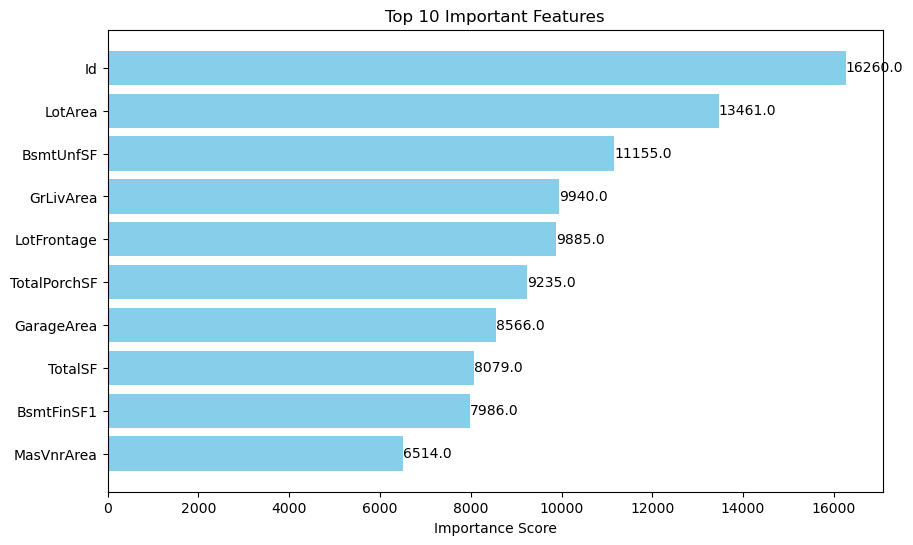

In [101]:
# Get the feature importances from the model
xgb_feature_importances = model.get_score(importance_type='weight')

# Sort the features in descending order by importance
sorted_xgb_feature_importances = dict(sorted(xgb_feature_importances.items(), key=lambda item: item[1], reverse=True))

# Select the top 10 features
top_10_features = list(sorted_xgb_feature_importances.keys())[:10]
top_10_importances = list(sorted_xgb_feature_importances.values())[:10]

# Plotting the top 10 feature importances as a bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_10_features[::-1], top_10_importances[::-1], color="skyblue")  # Reverse for highest on top
plt.xlabel("Importance Score")
plt.title("Top 10 Important Features")

# Adding text labels to each bar
for index, value in enumerate(top_10_importances[::-1]):
    plt.text(value, index, f"{value}", va='center', ha='left', color='black', fontsize=10)

plt.show()

For this project, I developed an XGBoost model to forecast home values using a variety of variables from the datasets. First, I wrangled the data, managing missing values using imputation algorithms tailored to each feature. I then applied feature engineering techniques to reduce dimensionality and create informative features that improved the model’s performance. Categorical variables were encoded using one-hot, target, and ordinal encoding methods.

To achieve optimal results, the XGBoost model underwent extensive hyperparameter tuning during training. The final model demonstrated strong predictive performance, with a validation RMSE of 0.1218. When applied to the test dataset, the model achieved a Kaggle score of 0.13149.

Feature importance analysis identified the top ten predictors of property values: Id, LotArea, BsmtUnfSF, GrLivArea, LotFrontage, TotalPorchSF, GarageArea, TotalSF, BsmtFinSF1, and MasVnrArea. This analysis provided useful insights into how different property attributes influence home prices.

The model offers practical applications for both sellers and buyers in the real estate market. Sellers, including real estate agents, developers, and homeowners, can use it to establish competitive prices that reflect market trends. Developers can also leverage it to estimate property values before listing, ensuring alignment with market expectations. On the buyer side, homebuyers and investors could use the predictions to assess whether listed prices are reasonable, while financial institutions could incorporate the model into their loan approval processes to accurately estimate property values and mitigate lending risks.

In summary, this project demonstrated the successful application of data preprocessing, feature engineering, and model building to solve a regression problem, with results that highlight the potential value of the model for key stakeholders in the real estate sector.

